##### Aldo Daniel Villaseñor Fierro
##### A01637907

In [161]:
import pandas as pd
import numpy as np
import plotly.express as px
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

#### En el siguiente documento se crea un modelo de machine learning para la clasificación de tumores en las categorías maligno y benigno en base a características obtenidas de estudios médicos

#### Exportando datos de archivo csv y creando variable dummy 'lbl_n' para la clasificación

In [162]:
df_main=pd.read_csv('wdbc.data',encoding = 'unicode_escape', engine ='python')
df_main['lbl_n']= df_main.lbl.replace({'M':1,'B':0})

#### Se toman solo variables que tengan una correlación mayor a 0.5 con la variable a clasificar 

In [163]:
m = df_main.corr()
m = m[m['lbl_n']>0.5]
df = df_main[m.index].drop('lbl_n',axis=1)

C:\Users\Aldo\AppData\Local\Temp\ipykernel_7336\411353408.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



#### Escalando variables a utilizar para entrenar el modelo

In [164]:
x_train, x_test, y_train , y_test = train_test_split(df,df_main.lbl_n,test_size=0.3,random_state=42)#, random_state=42)

scaler=MinMaxScaler()
scaler.fit(df)

x_train_t=scaler.transform(x_train)
x_test_t=scaler.transform(x_test)

#### Definiendo el modelo, se utilizará un Arbol de Desición utilizando la libreria sci-kit learn

In [165]:
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,roc_auc_score

model_tree=DecisionTreeClassifier(criterion='entropy',max_features='log2')
model_tree.fit(x_train_t,y_train)


DecisionTreeClassifier(criterion='entropy', max_features='log2')

#### Méticas del modelo para el set de training

In [166]:
y_hat_t=model_tree.predict(x_train_t)

y_hat_train=y_hat_t

model_t_acc=accuracy_score(y_train,y_hat_t)
model_t_f1=f1_score(y_train,y_hat_t)
model_t_auc=roc_auc_score(y_train,y_hat_t)

print(model_t_acc)
print(model_t_f1)
print(model_t_auc)
confusion_matrix(y_train,y_hat_t)

1.0
1.0
1.0


array([[249,   0],
       [  0, 149]], dtype=int64)

#### Métricas del modelo para el set de testing

In [167]:
y_hat_t=model_tree.predict(x_test_t)

model_t_acc=accuracy_score(y_test,y_hat_t)
model_t_f1=f1_score(y_test,y_hat_t)
model_t_auc=roc_auc_score(y_test,y_hat_t)

print(model_t_acc)
print(model_t_f1)
print(model_t_auc)
confusion_matrix(y_test,y_hat_t)

0.9415204678362573
0.9193548387096775
0.9338624338624338


array([[104,   4],
       [  6,  57]], dtype=int64)

#### plot bar con las feature importances de cada variable utilizada por el modelo

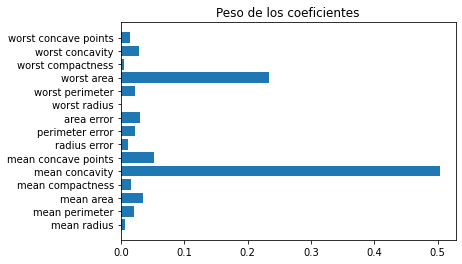

In [168]:
plt.barh(list(df.columns),list(model_tree.feature_importances_))
plt.title("Peso de los coeficientes")
plt.show()

#### Data Frame con las variables utilizadas y una columna para comparar predicciones hechas por el modelo y el valor real del set de datos

In [169]:
df_pruebas=pd.DataFrame()
df_pruebas['prediction'] = np.concatenate((y_hat_t,y_hat_train))
df_pruebas['real'] = np.concatenate((y_test,y_train))
df_pruebas[m.index[:-1]] = pd.concat([x_test,x_train],ignore_index=True)
df_pruebas

,prediction,real,mean radius,mean perimeter,mean area,mean compactness,mean concavity,mean concave points,radius error,perimeter error,area error,worst radius,worst perimeter,worst area,worst compactness,worst concavity,worst concave points
0,0,0,12.470,81.09,481.9,0.10580,0.08005,0.03821,0.3961,2.4970,30.29,14.970,96.05,677.9,0.23780,0.26710,0.10150
1,1,1,18.940,123.60,1130.0,0.10290,0.10800,0.07951,0.7888,5.4860,96.05,24.860,165.90,1866.0,0.23360,0.26870,0.17890
2,1,1,15.460,101.70,748.9,0.12230,0.14660,0.08087,0.4743,3.0940,48.31,19.260,124.90,1156.0,0.23940,0.37910,0.15140
3,0,0,12.400,81.47,467.8,0.13160,0.07741,0.02799,0.1767,2.2040,15.43,12.880,89.61,515.8,0.26290,0.24030,0.07370
4,0,0,11.540,74.65,402.9,0.11200,0.06737,0.02594,0.2784,1.6280,20.86,12.260,78.78,457.8,0.21180,0.17970,0.06918
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0,0,8.888,58.79,244.0,0.15310,0.08606,0.02872,0.5262,3.1680,25.44,9.733,62.56,284.4,0.24360,0.14340,0.04786
565,0,0,11.640,75.17,412.5,0.10170,0.07070,0.03485,0.3060,2.1550,20.62,13.140,85.51,521.7,0.26600,0.28730,0.12180
566,0,0,14.290,90.30,632.6,0.02675,0.00725,0.00625,0.1302,0.8439,10.77,14.910,94.44,684.6,0.05036,0.03866,0.03333
567,1,1,13.980,91.12,599.5,0.11330,0.11260,0.06463,0.2208,1.6020,18.85,17.040,113.90,869.3,0.35680,0.40690,0.18270


In [185]:
df_pruebas.iloc[np.random.randint(len(x_test_t), size=(3))]


,prediction,real,mean radius,mean perimeter,mean area,mean compactness,mean concavity,mean concave points,radius error,perimeter error,area error,worst radius,worst perimeter,worst area,worst compactness,worst concavity,worst concave points
58,1,1,13.48,88.40,559.2,0.1255,0.1063,0.05439,0.2130,1.545,18.52,15.53,107.30,740.4,0.4225,0.5030,0.2258
144,1,1,13.40,88.64,556.7,0.1469,0.1445,0.08172,0.3906,3.093,33.67,16.41,113.30,844.4,0.3856,0.5106,0.2051
86,1,1,12.46,83.97,475.9,0.2396,0.2273,0.08543,0.2976,2.039,23.94,15.09,97.65,711.4,1.0580,1.1050,0.2210
